In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load dataset
titanic = pd.read_excel('Titanic.xlsx')

In [28]:
#check missing values
print(titanic.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [29]:
print(titanic.columns)

# Handle missing values
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['cabin'] = titanic['cabin'].fillna('Unknown')
titanic['embarked'] = titanic['embarked'].fillna('Unknown')
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())
titanic['boat'] = titanic['boat'].fillna('Unknown')
titanic['body'] = titanic['body'].fillna('Unknown')
titanic['home.dest'] = titanic['home.dest'].fillna('Unknown')

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [30]:
print(titanic.isnull().sum())

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


In [31]:
# Feature engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Encode categorical variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

In [32]:
# Ensure all features used in model are present
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size', 'sex_male', 'embarked_S']

X = titanic[features]
y = titanic['survived']

In [33]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


e:\projects\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [37]:
#evaluation of models
from sklearn.metrics import accuracy_score

#logistic regression
y_pred = logreg.predict(X_test)
print('Logistic Regression:', accuracy_score(y_test, y_pred))

#Decision Tree
y_pred = model.predict(X_test)
print('Decision Tree:', accuracy_score(y_test, y_pred))

#Random Forest
y_pred = rf.predict(X_test)
print('Random Forest:', accuracy_score(y_test, y_pred))


Logistic Regression: 0.7824427480916031
Decision Tree: 0.7900763358778626
Random Forest: 0.7862595419847328


In [38]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

y_pred =  model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[128  16]
 [ 41  77]]
[[122  22]
 [ 33  85]]
[[124  20]
 [ 36  82]]


In [39]:
#comparing the all three models
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       144
           1       0.83      0.65      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.79      0.78      0.78       262

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       144
           1       0.79      0.72      0.76       118

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.79       262
weighted avg       0.79      0.79      0.79       262

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       144
           1       0.80      0.69      0.75       118

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.78       262



In [40]:
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

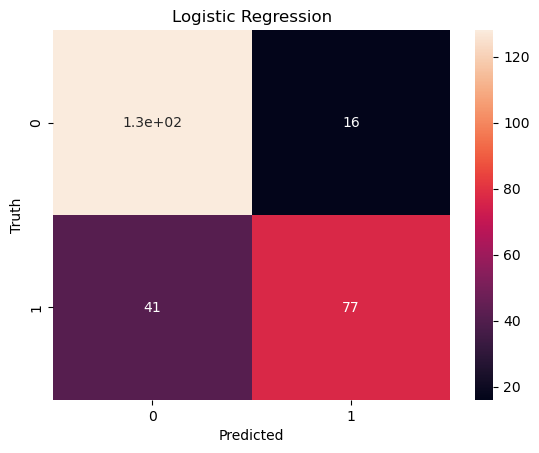

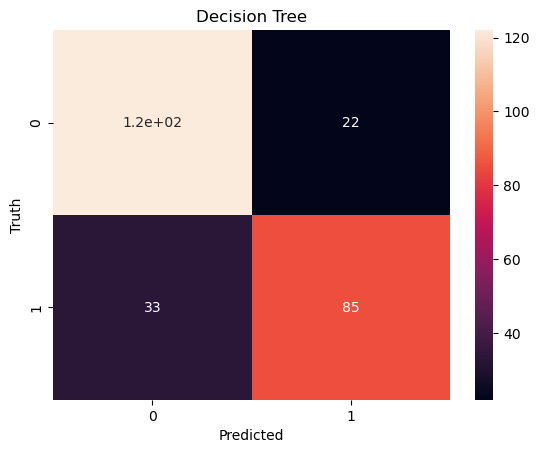

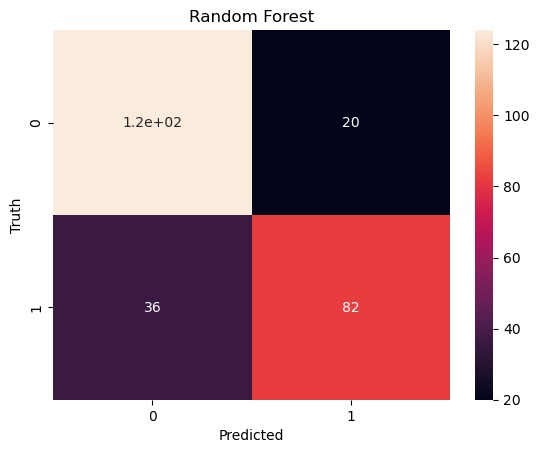

In [41]:
#compare models using visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure models are defined
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming the models are already trained in previous cells
# logistic regression
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression')
plt.show()

# Decision Tree
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree')
plt.show()

# Random Forest
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest')
plt.show()
